# Принятие решений в бизнесе

# Цель проекта: 

Часть 1. Приоритизировать составленный с отделом маркетинга список гипотез для увеличения прибыли интернет-магазина согласно фреймворку  ICE и RICE.

Список гипотез содержится в файле hypothesis.csv.
Описание данных:
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы

Часть 2. Проанализировать результаты проведенного А/В теста
- Выполнить предобработку данных
- Рассчитать кумулятивные метрики
- Построить графики кумулятивной выручки по группам, среднего чека, среднего количества заказов на пользователя по группам, а также графики относительного изменения данных метрик у группы В к группе А. 
- Провести анализ выбросов в данных
- Определить, существует ли статистически значимые различия в метриках по группам А/В теста (как по сырым, так и по отфильтрованным данным). 
- Сделать соответствующие выводы о необходимости остановки или дальнейшего продолжения эксперимента.

Описание данных:

Информация о заказах содержится в таблице orders.csv, где
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ

Информация о посетителях интернет-магазина содержится в таблице visitors.csv, где
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### Приоритизация гипотез 

In [1]:
#загружаем все необходимые библиотеки
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

In [2]:
#читаем и записываем данные о гипотезах в переменную
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep=',')
except:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv', sep=',')
    

In [3]:
#посмотрим, как выглядит датафрейм
display(hypothesis.head(5))
pd.options.display.max_colwidth = 130

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


Приведем к нижнему регистру названия столбцов:

In [4]:
hypothesis.columns = hypothesis.columns.str.lower()

*ICE (влияние, уверенность, усилия) — один из самых популярных
способов приоритизации задач.*

**ICE score = (Impact x Confidence) / Efforts**

*У этого метода есть модификация RICE (влияние, уверенность, усилия,
охват):*

**RICE score = (Reach x Impact x Confidence) / Efforts**

*Фреймворк RICE состоит из четырёх компонент:*

*- Reach — скольких пользователей затронет изменение, которое вы хотите внести;*

*- Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;*

*- Confidence — насколько вы уверены, что это изменение повлияет напользователей именно так;*

*- Efforts — сколько стоит протестировать эту гипотезу*

*Параметры фреймворков ICE и RICE оценивают в удобных шкалах: например, от 0 до 10.*

Выполним приоритезацию гипотез на основе фреймворка ICE:

In [5]:
#применим фреймворк ICE для приоритизации гипотез
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
display(round(hypothesis[['hypothesis', 'ICE']], 2).sort_values(by = 'ICE', ascending = False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Выполним приоритезацию гипотез на основе фреймворка RICE:

In [6]:
#применим фреймворк RICE для приоритизации гипотез
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
display(round(hypothesis[['hypothesis', 'RICE']], 2).sort_values(by = 'RICE', ascending = False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Результаты применения ICE и RICE различаются. В первом фреймворке лидируют гипотезы, имеющие низкий показатель охвата (вовлеченности) пользователей reach, но с высоким уровнем impact (степень влияния изменения на охваченных пользователей) и уверенности в правильной оценке показателей confidence. 
Лидеры среди гипотез по оценке RICE имеют больший охват пользователей.
Если сравнить лидеров ICE и RICE по трудозатратности efforts, то здесь нет различий, этот показатель на среднем уровне у обеих гипотез. Какую модель выбрать за основную, ICE или RICE, зависит от целей и стратегии компании.

*Таким образом, на основе данных об охвате пользователей, степени влияния, уверенности в оценке параметров, трудозатратности имеющихся гипотез была произведена приоритезация по критериям ICE и RICE. Результаты приоритизации должны быть учтены при дальнейшем составлении плана запуска проектов.*

###  Анализ А/В теста

#### Стабильность куммулятивных метрик 

##### Предобработка датасетов 

Загружаем данные в переменные, а затем выполним небольшую предобработку, чтобы проверить, что явных проблем с данными нет (пропуски, дубликаты)

In [7]:
#считываем результаты А/В теста в переменные orders и visitors
try:
    orders, visitors = (
        pd.read_csv('/datasets/orders.csv'),  # заказы
        pd.read_csv('/datasets/visitors.csv')  # посещение сайта
    )
except:
    orders, visitors = (
        pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv'),
        pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')
    )

In [8]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Изменим названия столбцов, приведем их к змеиному регистру и уберем заглавные буквы

In [10]:
orders = orders.rename(columns = {'transactionId' : 'transaction_id', 'visitorId': 'visitor_id'})

In [11]:
#проверяем, что все ок:
orders.columns

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

In [12]:
#выведем общую информацию о датасетах
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Пропусков в датасетах нет

In [13]:
#проверяем на наличие дубликатов
orders.duplicated().sum()
visitors.duplicated().sum() 

0

Дубликатов тоже нет

In [14]:
#проверяем, что в столбце с группами значения только А или В
orders['group'].unique()

array(['B', 'A'], dtype=object)

Посмотрим, в течении какого периода проводился тест:

In [15]:
print('Старт теста:', visitors['date'].min())
print('Окончание теста:', visitors['date'].max())

Старт теста: 2019-08-01
Окончание теста: 2019-08-31


Тест проводился в течении месяца, подписи осей графика нужно будет расположить вертикально, чтобы они не накладывались друг на друга. С качеством данных явных проблем нет, можно переходить к анализу результатов А/В теста

Проведем ряд дополнительных исследований. Посчитаем, сколько уникальных пользователей в каждой из групп:

In [16]:
#считаем количество уникальных пользователей в каждой группе
cnt_users_A = orders[orders['group'] == 'A']['visitor_id'].nunique()
cnt_users_B = orders[orders['group'] == 'B']['visitor_id'].nunique()
print('Кол-во уникальных пользователей в группе А:', cnt_users_A)
print('Кол-во уникальных пользователей в группе В:', cnt_users_B)

Кол-во уникальных пользователей в группе А: 503
Кол-во уникальных пользователей в группе В: 586


А теперь проверим, нет ли у нас пользователей, которые попали и в ту, и в другую группу:

In [17]:
#фильтруем данные по группам
users_A = orders[orders['group'] == 'A']
users_B = orders[orders['group'] == 'B']
#ищем количество пользователей в группе А, которые есть в группе В (порядок групп здесь не принципиален)
visitors_both = users_A.loc[users_A['visitor_id'].isin(users_B), 'visitor_id'].count()

visitors_both

0

Пользователи четко разделены по группам, пересечений нет, а значит трафик А/В теста разделен без ошибок.

А теперь посмотрим на динамику ежедневных посещений интернет-магазина по группам.

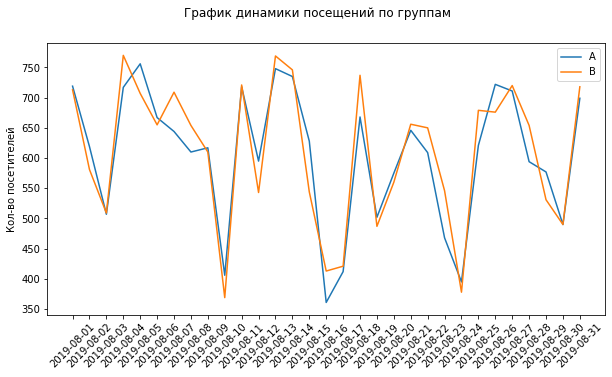

In [18]:
#фильтруем данные
visitors_A = visitors[visitors['group'] == 'A']
visitors_B = visitors[visitors['group'] == 'B']

#задаем размер графика побольше
plt.figure(figsize=(10, 5))
# Строим график динамики посещений по группе А
plt.plot(visitors_A['date'], visitors_A['visitors'], label='A');

# Строим график динамики посещений по группе B
plt.plot(visitors_B['date'], visitors_B['visitors'], label='B');
plt.xticks(rotation=45)
plt.legend(); 
plt.ylabel('Кол-во посетителей')
plt.suptitle('График динамики посещений по группам');

Обе группы повторяют друг за другом взлеты и падения. Есть ощущение, что интернет-магазин не пользуется популярностью по выходным дням.

##### Графики кумулятивной выручки по группам

Начинаем подсчет кумулятивных значений: 

In [19]:
# создаем массив уникальных пар значений дат и групп теста
date_group = orders[['date','group']].drop_duplicates() 

In [20]:
#cчитаем агрегированные кумулятивные данные о заказах по дням
orders_agg = date_group.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date' : 'max', 
            'group' : 'max', 
            'transaction_id' : 'nunique', 
            'visitor_id' : 'nunique', 
            'revenue' : 'sum'
        }
    ), 
    axis=1
).sort_values(by=['date','group'])

In [21]:
#cчитаем агрегированные кумулятивные данные о посещениях по дням
visitors_agg = date_group.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg(
        {
            'date' : 'max', 
            'group' : 'max', 
            'visitors' : 'sum'
        }
    ),
    axis=1
).sort_values(by=['date','group'])

In [22]:
#посмотрим, что получилось
orders_agg.head(5)

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [23]:
visitors_agg.head(5)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [24]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cum_data = orders_agg.merge(visitors_agg, left_on=['date', 'group'], right_on=['date', 'group'])
cum_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cum_data.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


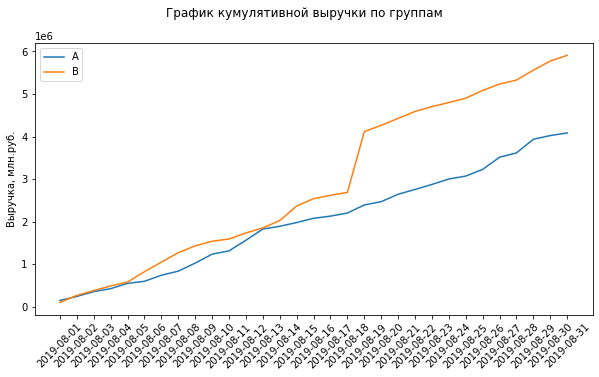

In [25]:
# разделяем данные в переменные, исходя из группы
cum_revenue_A = cum_data[cum_data['group']=='A'][['date','revenue', 'orders']]

# теперь выделяем данные группы В
cum_revenue_B = cum_data[cum_data['group']=='B'][['date','revenue', 'orders']]
#задаем размер графика побольше
plt.figure(figsize=(10, 5))
# Строим график выручки группы А
plt.plot(cum_revenue_A['date'], cum_revenue_A['revenue'], label='A');

# Строим график выручки группы B
plt.plot(cum_revenue_B['date'], cum_revenue_B['revenue'], label='B');
plt.xticks(rotation=45)
plt.legend(); 
plt.ylabel('Выручка, млн.руб.')
plt.suptitle('График кумулятивной выручки по группам');

По графику видно, что в обеих группах выручка увеличивается в течении всего периода проведения теста. Однако в группе В есть резкий скачок 18-08-2019, что возможно связано с появлением очень дорогих заказов или резким всплеском активности. Необходимо учесть это в дальнейшем. 
Уровень выручки в группе В превосходит группу А практически по всему периоду проведения эксперимента.
Посмотрим, какая ситуация сложилась с показателями средних чеков по группам.

##### Графики кумулятивного среднего чека 

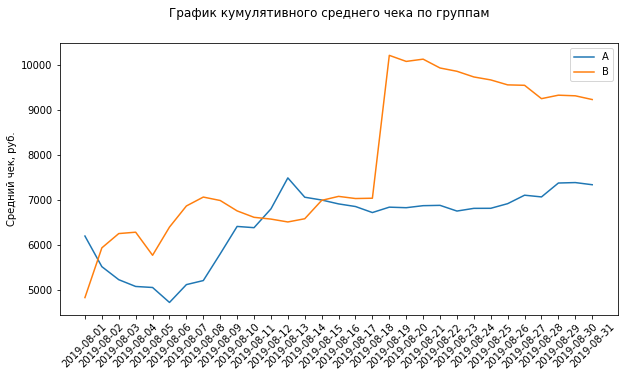

In [26]:
#задаем размер графика побольше
plt.figure(figsize=(10, 5))
#строим график среднего чека по датам в группе А
plt.plot(cum_revenue_A['date'], cum_revenue_A['revenue']/cum_revenue_A['orders'], label='A');
#строим график среднего чека по датам в группе В
plt.plot(cum_revenue_B['date'], cum_revenue_B['revenue']/cum_revenue_B['orders'], label='B');
#переворачиваем подписи по Х
plt.xticks(rotation=45)
plt.legend();
plt.ylabel('Средний чек, руб.')
plt.suptitle('График кумулятивного среднего чека по группам');

В первой половине срока проведения теста были резкие колебания метрики среднего чека. Данные стабилизировались только к концу. В группе В здесь наблюдается тот же скачок (в дату 18-08-2019 - 19-08-2019), в эту группу, похоже, попали крупные заказы. Группа В превосходит группу А по уровню среднего чека к концу проведения эксперимента.

Построим график относительного изменения кумулятивного среднего чека группы B к группе A:

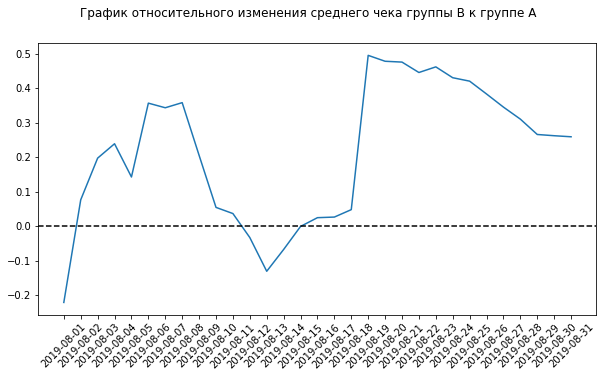

In [27]:
# объединяем данные
merged_data = cum_revenue_A.merge(cum_revenue_B, left_on='date', right_on='date', how='left', suffixes=['A', 'B']);

#задаем размер графика побольше
plt.figure(figsize=(10, 5))
# cтроим график отношения средних чеков
plt.plot(
    merged_data['date'], 
    (merged_data['revenueB']/merged_data['ordersB'])/(merged_data['revenueA']/merged_data['ordersA'])-1
);
plt.suptitle('График относительного изменения среднего чека группы В к группе А')

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');
#переворачиваем подписи по Х
plt.xticks(rotation=45);

Судя по графику, резкий скачок в разнице между группами наблюдается не только 18-08-2019 - 19-08-2019, как уже показали предыдущие графики, но и в другие даты. Необходимо провести анализ выбросов в данных.

##### Графики кумулятивного среднего количества заказов на посетителя по группам 

In [28]:
# считаем кумулятивное количество заказов на посетителя, будем считать это отношение конверсией
cum_data['conversion'] = cum_data['orders']/cum_data['visitors']

# отделяем данные по группе A
cum_data_A = cum_data[cum_data['group']=='A']

# отделяем данные по группе B
cum_data_B = cum_data[cum_data['group']=='B']

In [29]:
cum_data_A.head(5)

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
2,2019-08-02,A,44,38,242401,1338,0.032885
4,2019-08-03,A,68,62,354874,1845,0.036856
6,2019-08-04,A,84,77,425699,2562,0.032787
8,2019-08-05,A,109,100,549917,3318,0.032851


In [30]:
cum_data_B.head(5)

,date,group,orders,buyers,revenue,visitors,conversion
1,2019-08-01,B,21,20,101217,713,0.029453
3,2019-08-02,B,45,43,266748,1294,0.034776
5,2019-08-03,B,61,59,380996,1803,0.033833
7,2019-08-04,B,78,75,489567,2573,0.030315
9,2019-08-05,B,101,98,581995,3280,0.030793


Для задания масштаба осей нам необходимо передать максимальное и минимальное значение по осям Х и Y. По оси Х у нас даты проведения теста, начальная и конечная дата - 01/08/2019 и 31/08/2019 соответственно.
Найдем минимальное и максимальное значение по оси Y, чтобы наш график не выходил за пределы масштаба:

In [31]:
cum_data_B['conversion'].max(), cum_data_A['conversion'].max()

(0.036323084275927994, 0.03685636856368564)

In [32]:
cum_data_B['conversion'].min(), cum_data_A['conversion'].min()

(0.029453015427769985, 0.029217427214536445)

Соответственно, для масштаба осей по Y вполне подойдет интервал 0 - 0.04

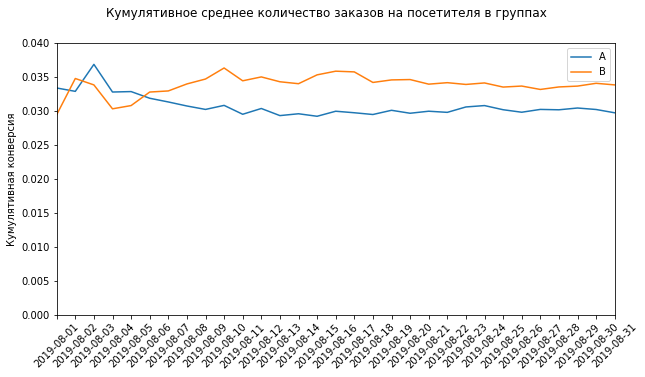

In [33]:

#задаем размер графика побольше
plt.figure(figsize=(10, 5))
# строим графики
plt.plot(cum_data_A['date'], cum_data_A['conversion'], label='A');
plt.plot(cum_data_B['date'], cum_data_B['conversion'], label='B');
plt.legend();

plt.suptitle('Кумулятивное среднее количество заказов на посетителя в группах');
#переворачиваем подписи по Х
plt.xticks(rotation=45);
plt.ylabel('Кумулятивная конверсия')
# задаем масштаб осей
plt.axis(["2019-08-01", '2019-08-31', 0, 0.04]); 


График получился почти симметричный. В первой половине срока проведения теста в обеих группах были сильные колебания, к концу скачки уменьшились. Несмотря на наличие колебаний в начале проведения эксперимента конверсия группы В заметно выше, чем в группе А.

Построим график относительного изменения среднего количества заказов на посетителя группы В к группе А

Объединяем столбцы с конверсиями по группам и датой в одной таблице:

In [34]:
merged_data_conv = cum_data_A[['date','conversion']].merge(
            cum_data_B[['date','conversion']], 
            left_on='date', 
            right_on='date', 
            how='left', 
            suffixes=['A', 'B']
          )


Посмотрим минимальное и максимальное значение отношения конверсий по формуле: кумулятивная метрика группы В / кумулятивная метрика группы А - 1, чтобы задать масштаб осей

In [35]:
(merged_data_conv ['conversionB']/merged_data_conv['conversionA']-1).min()

-0.11763674614305752

In [36]:
(merged_data_conv ['conversionB']/merged_data_conv['conversionA']-1).max()

0.20861086572438148

Для масштаба оси Y нам вполне подойдет интервал -0.2 - 0.3, по оси X остаются даты начала и окончания теста

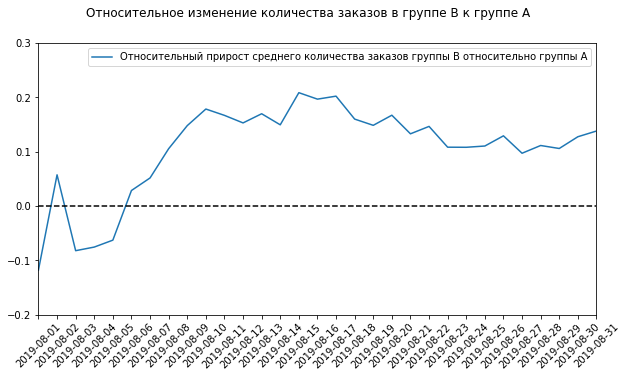

In [37]:
#задаем размер графика побольше
plt.figure(figsize=(10, 5))
#строим график
plt.plot(
    merged_data_conv['date'], 
    merged_data_conv ['conversionB']/merged_data_conv['conversionA']-1, 
    label="Относительный прирост среднего количества заказов группы B относительно группы A"
);

plt.suptitle('Относительное изменение количества заказов в группе В к группе А')
plt.legend();

plt.axhline(y=0, color='black', linestyle='--');

#переворачиваем подписи по Х
plt.xticks(rotation=45);
plt.axis(["2019-08-01", '2019-08-31', -0.2, 0.3]);

В первые дни проведения теста конверсия (среднее число заказов на посетителя) в группе В была ниже группы А, затем произошел стремительный рост, показатель в группе В стал выше группы А, однако эта метрика не зафиксировалась, ее колебания продолжаются. Рост продолжался до 18-08, а затем пошло постепенное снижение.

##### Анализ выбросов 

Графики кумулятивной выручки и среднего чека по группам показали резкие скачки метрик, поэтому необходимо провести анализ аномалий в данных. В нашем случае это аномально дорогие заказы и аномально активные пользователи, совершившие очень много заказов. Для начала построим гистограмму распределения стоимости заказов:

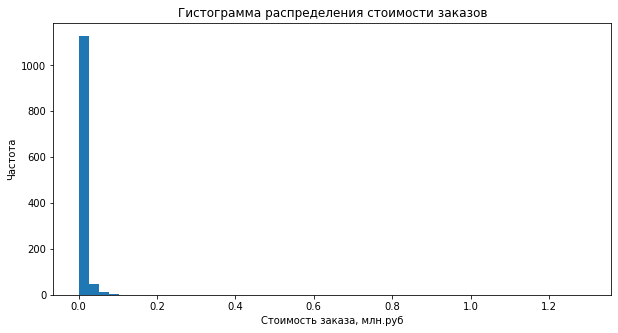

In [38]:
#задаем размер графика побольше
plt.figure(figsize=(10, 5))
#разделим выручку на 1000000, чтобы не получить на графике цифры со степенями, гистограмму детализируем на 50 корзин

plt.hist(orders['revenue']/1000000, bins = 50);
plt.xlabel('Стоимость заказа, млн.руб')
plt.ylabel('Частота')
plt.title('Гистограмма распределения стоимости заказов');

По гистограмме видно, что основная часть заказов распределилась в диапазоне от 0 до 50000, однако присутствуют и более дорогие заказы от 50000 до 100000. Построим точечный график распределения стоимости заказов:

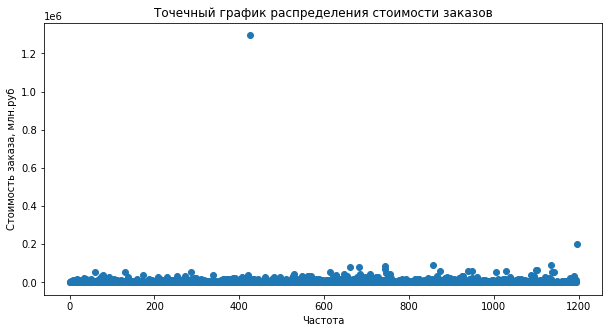

In [39]:
#задаем размер графика побольше
plt.figure(figsize=(10, 5))
#задаем значения по оси Х
x_values = pd.Series(range(0,len(orders['revenue'])));

plt.scatter(x_values, orders['revenue']); 
plt.xlabel('Частота')
plt.ylabel('Стоимость заказа, млн.руб')
plt.title('Точечный график распределения стоимости заказов');

Посмотрим, как выглядит распределение по стоимости заказов, если убрать 2 точки с аномально дорогими. Для этого отфильтруем данные, установим верхнюю границу стоимости заказов в 150000, построим точечный график на получившемся срезе данных:

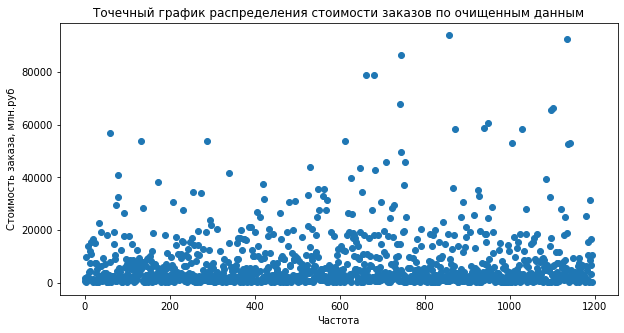

In [40]:
#фильтруем данные по выручке
orders_fil = orders.loc[orders['revenue'] < 150000]
#задаем размер графика побольше
plt.figure(figsize=(10, 5))
#задаем значения по оси Х
x_values = pd.Series(range(0,len(orders_fil['revenue'])));
plt.scatter(x_values, orders_fil['revenue']);
plt.xlabel('Частота')
plt.ylabel('Стоимость заказа, млн.руб')
plt.title('Точечный график распределения стоимости заказов по очищенным данным');

По этому графику распределение стоимости заказов выглядит вполне равномерно, близко к нормальному.

In [41]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


Не более 1% заказов дороже 58 233,2 рублей, и не более 5% заказов дороже 28 000 рублей.
Посмотрим на распределение количества заказов на пользователя.
Таким образом, границей для того чтобы считать заказ аномально дорогим, можно считать 30 000 рублей

Считаем количество заказов на пользователя

In [42]:
order_per_user = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

order_per_user.columns = ['visitor_id', 'orders']

display(order_per_user.sort_values(by='orders', ascending=False).head(10)) 
print('Среднее значение количества заказов:', round(order_per_user['orders'].mean(), 2))

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Среднее значение количества заказов: 1.16


Есть пользователи, которые совершили 11, 9, 8 заказов за месяц. При среднем количестве заказов на пользователя чуть выше 1!
Построим гистограмму распределения количества заказов на пользователя:

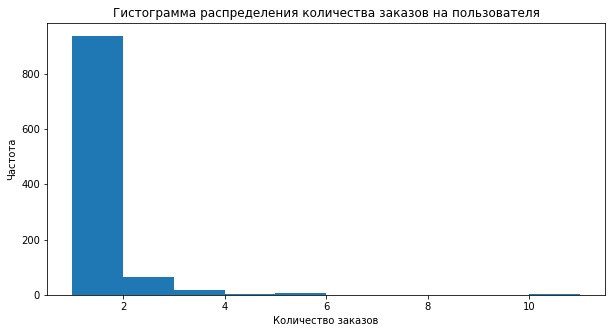

In [43]:
#задаем размер графика побольше
plt.figure(figsize=(10, 5))
#строим гистограмму
plt.hist(order_per_user['orders']);
plt.xlabel('Количество заказов')
plt.ylabel('Частота')
plt.title('Гистограмма распределения количества заказов на пользователя');

По гистограмме видно, что основная часть распределилась в интервале от 1 до 2 заказов, но есть также хвост со значениями от 2 до 11 заказов.
Построим точечный график распределения количества заказов на пользователя:

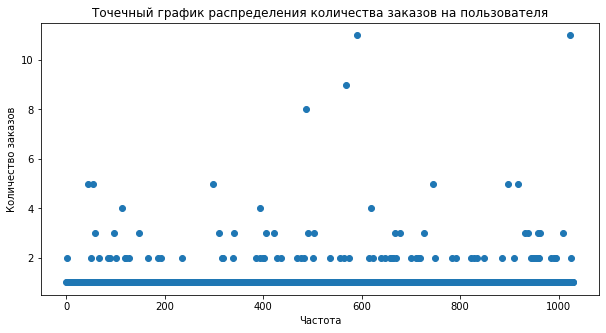

In [44]:
#задаем размер графика побольше
plt.figure(figsize=(10, 5))
#задаем значения по оси Х
x_values = pd.Series(range(0,len(order_per_user)));
plt.scatter(x_values, order_per_user['orders']);
plt.xlabel('Частота')
plt.ylabel('Количество заказов')
plt.title('Точечный график распределения количества заказов на пользователя');

Много пользователей с 2 заказами, и много с 3 и выше. Посчитаем долю таких пользователей, найдем перцентили:

In [45]:
print(np.percentile(order_per_user['orders'], [90, 95, 99]))

[1. 2. 4.]


Не более 5% пользователей совершают более 2 заказов, и не более 1% - более 4 заказов. 
За верхнюю границу можно принять количество заказов, равное 3.

Поскольку у нас 2 критерия для попадания в список аномальных пользователей - стоимость заказа и количество заказов, целесообразно использовать значение 99-го перцентиля для дальнейшей фильтрации данных, чтобы не превысить допустимую границу. Таким образом, аномальными пользователями будем считать тех, кто оформил заказ стоимостью свыше 58233 рублей, а также совершившие от 4 и более заказов за период проведения эксперимента.

##### Подсчет статистической значимости различий в среднем количестве заказов на посетителя по группам по сырым данным 

Формулируем гипотезы.

H_0: различий в среднем количестве заказов на посетителя между группами нет.

H_а: различия в среднем между группами есть

Подготовим таблицы для анализа. Создадим таблицу, в которой по дате будет собрана информация о количестве посетителей в каждой из групп, количестве заказов, выручке и кумулятивные метрики по каждой группе

In [46]:
#отфильтровываем данные таблицы о посещениях по группе А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

#cчитаем кумулятивное количество посетителей по группе А
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

#отфильтровываем данные по группе В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

#считаем кумулятивное количество посетителей по группе В
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

Теперь по аналогии готовим столбцы на основе таблицы orders

In [47]:
#отфильтровываем данные из таблицы с заказами по группе А, группируем по дате
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

#считаем кумулятивное количество заказов и выручку за день по группе А
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

#аналогично - по группе В
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [48]:
#сводим все в одну таблицу
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [49]:
#считаем количество заказов на пользователя по группе А
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']
#считаем количество заказов на пользователя по группе B
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 


In [50]:
#в переменной sampleA пользователю будет определено количество заказов, а у тех, кто ничего не заказал - 0
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
#аналогично для группы В
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
#уровень статистической значимости
alpha = 0.05
#применяем тест Манна-Уитни
results_pvalue = stats.mannwhitneyu(sampleA, sampleB)[1]

print('p_value:', "{0:.3f}".format(results_pvalue))

#вычисляем относительное различие в среднем между группами
print('Относительное различие между группами:', "{0:.2f}".format((sampleB.mean() / sampleA.mean() - 1) * 100), '%')

# условный оператор с выводом строки с ответом
if results_pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p_value: 0.017
Относительное различие между группами: 13.81 %
Отвергаем нулевую гипотезу


Получившееся значение p-value меньше 0.05 (уровень критической значимости). Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. 

Относительный прирост по количеству заказов группы B равен 13.8%
Посмотрим, какие результаты получатся на отфильтрованных данных

##### Подсчет статистической значимости различий в среднем чеке заказа по группам по сырым данным

Формулируем гипотезы.
H_0: различий в среднем чеке заказа между группами нет. 
H_а: различия в среднем чеке заказа между группами есть

In [51]:
#передаем в тест Манна-Уитни данные о среднем чеке
results_pvalue = stats.mannwhitneyu(
    orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]

print('p_value:', "{0:.3f}".format(results_pvalue))
#вычисляем относительное различие в среднем между группами
print('Относительное различие между группами:', '{0:.2f}'.format((orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1) * 100), '%') 

# условный оператор с выводом строки с ответом
if results_pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")




p_value: 0.729
Относительное различие между группами: 25.87 %
Не получилось отвергнуть нулевую гипотезу


Получившееся значение p-value значительно выше 0.05, что говорит о том, что нулевую гипотезу отвергать нельзя. Оснований предполагать, что в среднем чеке заказа есть различия между группами, нет.
Однако средний чек группы В значительно выше, чем в группе А, относительное различие составляет 25.9%

##### Подсчет статистической значимости различий в среднем количестве заказов на посетителя по группам с учетом аномалий

Итак, аномально дорогими заказами мы решили считать заказы выше 30 000 рублей (менее 5% заказов) и пользователей, совершивших более 3 заказов, также считаем аномально активными (тоже менее 5% пользователей).
Соберем эти аномалии воедино, чтобы оценить, какую долю мы хотим отсечь.

In [52]:
#cчитаем аномально активных пользователей с более чем 3 заказами
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] >= 4]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] >= 4]['userId'],
    ],
    axis=0,
)
#считаем пользователей с аномально дорогими заказами
usersWithExpensiveOrders = orders[orders['revenue'] >= 58233]['visitor_id']
#объединяем их в одну таблицу, избавляемся от дубликатов
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
#выведем 5 строк получившейся таблицы
print(abnormalUsers.head(5))
#считаем, сколько таких пользователей у нас получилось
print(abnormalUsers.shape[0], '- количество аномальных пользователей') 

1099    148427295
18      199603092
23      237748145
949     887908475
744     888512513
dtype: int64
20 - количество аномальных пользователей


Получили всего 20 аномальных пользователей

In [53]:
#Посчитаем, сколько это от общего числа пользователей
print(round(abnormalUsers.shape[0]/orders['visitor_id'].nunique(), 4) * 100 , '%')

1.94 %


In [54]:
#Посчитаем, какую долю данных мы усекаем
orders_abnormal = orders.loc[orders['visitor_id'].isin(abnormalUsers), 'transaction_id'].count()
print(round(orders_abnormal/orders.shape[0], 4) * 100, '%')

6.43 %


Мы отсекаем 6,43% данных, укладываемся в предельно допустимую долю.

Фильтруем данные, подготавливаем для проверки гипотез:

In [55]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [56]:
#передаем в тест Манна-Уитни отфильтрованные данные:
results_pvalue = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]

print('p_value:', "{0:.3f}".format(results_pvalue))
#вычисляем относительное различие в среднем между группами
print('Относительное различие между группами:', '{0:.2f}'.format((sampleBFiltered.mean()/sampleAFiltered.mean()-1) * 100), '%')

# условный оператор с выводом строки с ответом
if results_pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    

p_value: 0.014
Относительное различие между группами: 15.10 %
Отвергаем нулевую гипотезу


Результаты практически не изменились. Получившееся значение p-value меньше 0.05 (уровень критической значимости). Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем.
Показатели среднего числа заказов в группе В превышают  группу А на 15,1%

Проверяем гипотезу о различиях в среднем чеке между группами на отфильтрованных данных:

In [57]:
#передаем в тест Манна-Уитни данные о среднем чеке
results_pvalue = stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]

print('p-value:', "{0:.3f}".format(results_pvalue))
#вычисляем относительное различие в среднем между группами
print('Относительное различие между группами:',
    "{0:.2f}".format((
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    ) * 100), '%'
)  

# условный оператор с выводом строки с ответом
if results_pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-value: 0.959
Относительное различие между группами: -1.39 %
Не получилось отвергнуть нулевую гипотезу


P-value увеличился, но и разница между сегментами существенно сократилась с 25,9% до -1,39%. 
Нулевую гипотезу отвергать нельзя, как и предполагалось в тесте без учета аномалий.
Выбросы в данных повлияли на относительную разницу среднего чека между группами.
С учетом аномалий группа B не превышает показатели группы А, напротив, слегка уступает по метрике среднего чека.

##### Графики кумулятивной выручки, среднего чека, количества заказов на пользователя по группам по очищенным данным 

Проверим, как будут выглядеть графики кумулятивной выручки, среднего чека, количества заказов на пользователя по группам в случае очищенных от аномалий данных.

In [58]:
#сохраняем очищенные данные
orders_filtered = orders[
            np.logical_not(orders['visitor_id'].isin(abnormalUsers)
            )
        ]

orders_filtered.head(5)


,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


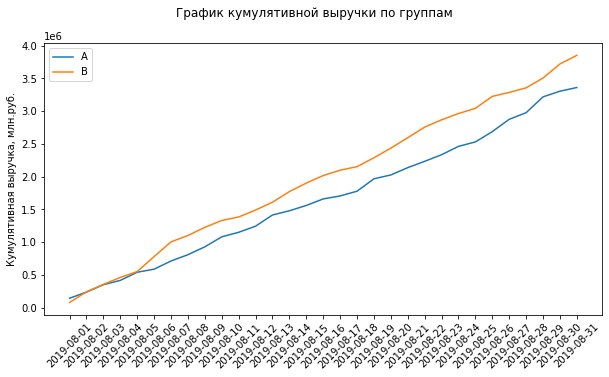

In [59]:
#делаем такой же алгоритм, как выше, только на очищенных данных
date_group_f = orders_filtered[['date','group']].drop_duplicates() 
orders_agg_f = date_group_f.apply(
    lambda x: orders_filtered[
        np.logical_and(
            orders_filtered['date'] <= x['date'], orders_filtered['group'] == x['group']
        )
    ].agg(
        {
            'date' : 'max', 
            'group' : 'max', 
            'transaction_id' : 'nunique', 
            'visitor_id' : 'nunique', 
            'revenue' : 'sum'
        }
    ), 
    axis=1
).sort_values(by=['date','group'])

cum_data_f = orders_agg_f.merge(visitors_agg, left_on=['date', 'group'], right_on=['date', 'group'])
cum_data_f.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cum_revenue_A_f = cum_data_f[cum_data_f['group']=='A'][['date','revenue', 'orders']]

# теперь выделяем данные группы В
cum_revenue_B_f = cum_data_f[cum_data_f['group']=='B'][['date','revenue', 'orders']]
#задаем размер графика
plt.figure(figsize=(10, 5))
# Строим график выручки группы А
plt.plot(cum_revenue_A_f['date'], cum_revenue_A_f['revenue'], label='A');

# Строим график выручки группы B

plt.plot(cum_revenue_B_f['date'], cum_revenue_B_f['revenue'], label='B');
plt.xticks(rotation=45)
plt.legend(); 
plt.ylabel('Кумулятивная выручка, млн.руб.')
plt.suptitle('График кумулятивной выручки по группам');

В полученном графике уже не такое сильное отклонение группы В от группы А, пропал резкий скачок, соответствующий дате 18-08-2019, однако линия В все равно расположена выше. 

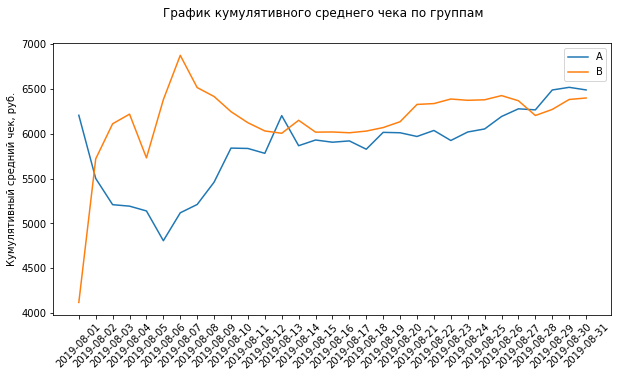

In [60]:
#задаем размер графика
plt.figure(figsize=(10, 5))
#строим график среднего чека по датам в группе А
plt.plot(cum_revenue_A_f['date'], cum_revenue_A_f['revenue']/cum_revenue_A_f['orders'], label='A');
#строим график среднего чека по датам в группе В
plt.plot(cum_revenue_B_f['date'], cum_revenue_B_f['revenue']/cum_revenue_B_f['orders'], label='B');
#переворачиваем подписи по Х
plt.xticks(rotation=45)
plt.legend();
plt.ylabel('Кумулятивный средний чек, руб.')
plt.suptitle('График кумулятивного среднего чека по группам');

На очищенных данных пропал резкий скачок метрики у группы В. После нескольких колебаний к концу эксперимента она стала уступать группе А, чего не было на графике по "сырым" данным.

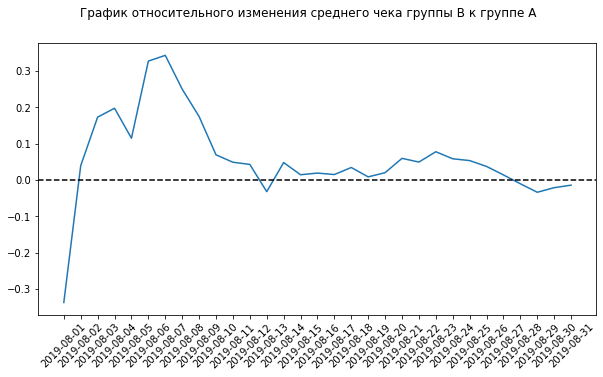

In [61]:
# объединяем данные
merged_data_f = cum_revenue_A_f.merge(cum_revenue_B_f, left_on='date', right_on='date', how='left', suffixes=['A', 'B']);

#задаем размер графика
plt.figure(figsize=(10, 5))
# cтроим график отношения средних чеков
plt.plot(
    merged_data_f['date'], 
    (merged_data_f['revenueB']/merged_data_f['ordersB'])/(merged_data_f['revenueA']/merged_data_f['ordersA'])-1
);
plt.suptitle('График относительного изменения среднего чека группы В к группе А')

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');
#переворачиваем подписи по Х
plt.xticks(rotation=45);

График относительного изменения среднего чека группы В к группе А также свидетельствует о снижении этого показателя у группы В к концу эксперимента. Однако делать определенные выводы из этого графика нельзя.

In [62]:
cum_data_f['conversion'] = cum_data_f['orders']/cum_data_f['visitors']

# отделяем данные по группе A
cum_data_A_f = cum_data_f[cum_data_f['group']=='A']

# отделяем данные по группе B
cum_data_B_f = cum_data_f[cum_data_f['group']=='B']

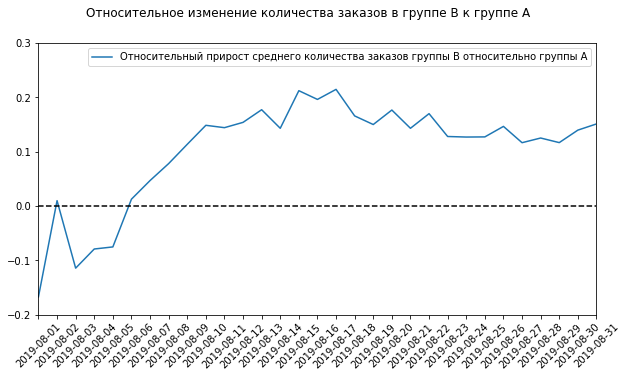

In [63]:
merged_data_conv_f = cum_data_A_f[['date','conversion']].merge(
            cum_data_B_f[['date','conversion']], 
            left_on='date', 
            right_on='date', 
            how='left', 
            suffixes=['A', 'B']
          )
#задаем размер графика
plt.figure(figsize=(10, 5))
#строим график
plt.plot(
    merged_data_conv_f['date'], 
    merged_data_conv_f['conversionB']/merged_data_conv_f['conversionA']-1, 
    label="Относительный прирост среднего количества заказов группы B относительно группы A"
);

plt.suptitle('Относительное изменение количества заказов в группе В к группе А')
plt.legend();

plt.axhline(y=0, color='black', linestyle='--');

#переворачиваем подписи по Х
plt.xticks(rotation=45);
plt.axis(["2019-08-01", '2019-08-31', -0.2, 0.3]);

А вот график по относительному изменению количества заказов на посетителя группы В к группе А практически не изменился на отфильтрованных данных. С заказами на посетителя в группе В все гораздо лучше, чем в группе А. Тенденция на снижение не наблюдается.

**Выводы:**
- Существует статистически значимое различие по среднему количеству заказов между группами по «сырым», а также по данным после фильтрации аномалий; данная метрика в группе В превышает группу А на 15,1% на отфильтрованных данных

- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий, группа В на отфильтрованных данных уступает группе А по этому показателю на 1.39%;

Построенные графики кумулятивной выручки, среднего чека, количества заказов на пользователя показывают, что данные метрики продолжают колебаться, есть превосходство группы В по среднему количеству заказов на пользователя, кумулятивной выручке и небольшое отставание от группы А по среднему чеку.

На мой взгляд, наиболее целесообразным в данной ситуации является остановить эксперимент и признать А/В тест успешным.

### Общий вывод

<div class="alert alert-info"> <b>
На основе данных о гипотезах была проведена их приоритизация по фреймворку ICE и RICE.  В рейтинге по ICE лидируют гипотезы, имеющие низкий показатель охвата (вовлеченности) пользователей, но с высокой степенью влияния изменения на охваченных пользователей и уверенностью в правильной оценке показателей. Лидеры среди гипотез по оценке RICE имеют больший охват пользователей. Если сравнить лидеров ICE и RICE по трудозатратности, то здесь нет различий. Выбор между полученными рейтингами гипотез ICE и RICE зависит от целей и стратегии компании.</b> 
    
<b>В ходе проекта был также проведен анализ результатов А/В теста. На этапе предобработки данных в исходных датафреймах были изменены названия столбцов на нижний регистр и соответствие "змеиному коду". В целом данные очень качественные, дубликатов нет, пропуски также отсуствуют.</b> 
    
<b>Перед анализом А/В теста  были выдвинуты следующие задачи:</b> 

<b> 1. Построить графики кумулятивной выручки, среднего чека, среднего количества заказов на посетителя по группам, а также графики относительного изменения данных метрик в группе В к группе А.
</b> 
    
<b> 2. Провести анализ выбросов в данных: построить точечный график количества заказов по пользователям, точечный график стоимости заказов, посчитать 95-й и 99-й перцентили 
</b> 
        
<b> 3. Посчитать статистическую значимость различий в среднем чеке заказа, среднем количестве заказов на пользователя по группам, как по "сырым", так и по очищенным от аномалий данным
</b> 
    
<b> В ходе анализа был изучен каждый из вышеперечисленных показателей, построены графики их изменения. Исследование позволило получить следующие результаты:</b> 

<b> 1. График кумулятивной выручки: в обеих группах выручка увеличивается в течении всего периода проведения теста. Уровень выручки в группе В превосходит группу А практически по всему периоду проведения эксперимента. До фильтрации данных на графике в группе В был резкий скачок (соответствующий дате 18-08-2019), который не фиксируется на очищенных от аномалий данных. Несмотря на это, превосходство группы В по выручке на отфильтрованных данных сохраняется. </b> 
 
<b>     График среднего чека: в первой половине срока проведения эксперимента были резкие колебания метрики среднего чека. Данные стабилизировались только к концу. На неотфильтрованных от аномалий данных группа В превосходит группу А по среднему чеку, на данных без аномальных пользователей к концу проведения эксперимента группа В, напротив, начинает уступать группе А. </b> 

<b>     График относительного изменения среднего чека группы В к группе А свидетельствует о снижении этого показателя у группы В к концу эксперимента на отфильтрованных данных, по сырым данным картина обратная - группа В превосходит группу А. В обоих случаях на графике метрика имеет сильные колебания, поэтому делать какие-либо точные выводы по нему нельзя.</b> 

<b>     График кумулятивного среднего количества заказов на посетителя по группам: в  первой половине срока проведения теста в обеих группах были сильные колебания, к концу скачки уменьшились, метрика стабилизировалась. Конверсия группы В заметно выше, чем в группе А. Об этом же свидетельствует график относительного изменения среднего количества заказов на посетителя в группе В к группе А, группа В явно лидирует, как на сырых, так и на отфильтрованных данных. </b> 
    
<b> 2.  Построенные точечные графики количества заказов по пользователям, стоимости заказов показал начилие аномалий в данных. Подсчет перцентилей позволил определить, что менее 5% заказов оформляются на сумму выше 28 000 рублей, и не более 1% - свыше 58 233,2 рублей.  </b>
    
 <b>    По количеству заказов ситуация следующая: не более 5% пользователей совершают более 2 заказов, и не более 1% - более 4 заказов.  </b>
    
<b>    Таким образом, аномальными пользователями были приняты те, кто оформил заказ на сумму свыше 58233 рублей, а также от 4 и более заказов в исследуемый период (99-й перцентиль). Из общего объема данных аномалии составляют 6,43%, что укладывается в верхний предел по фильтрации данных.</b> 
    
    
<b> 3. Существует статистически значимое различие по среднему количеству заказов на пользователя между группами как по «сырым», так и по данным после фильтрации аномалий, данная метрика в группе В превышает группу А на 15,1% (на отфильтрованных данных). </b>    
    

<b>Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий, группа В на отфильтрованных данных уступает группе А по этому показателю на 1.39%.
    

<b>Поскольку есть явное превосходство группы В по одной из метрик (количество заказов на посетителя), и отсутствие различия (а соответственно, и проигрыша) по другой (средний чек заказа), а также превосходство группы В по данным из графика кумулятивной выручки, эксперимент целесообразно остановить и признать А/В тест успешным. </b> 

</div>  
